In [800]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind

In [801]:
!gdown https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 84.7MB/s]


In [802]:
df = pd.read_csv('bike_sharing.csv')

In [803]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [804]:
df.shape

(10886, 12)

In [805]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [806]:
df['datetime'] = pd.to_datetime(df['datetime'])
max(df['datetime']) - min(df['datetime'])

Timedelta('718 days 23:00:00')

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


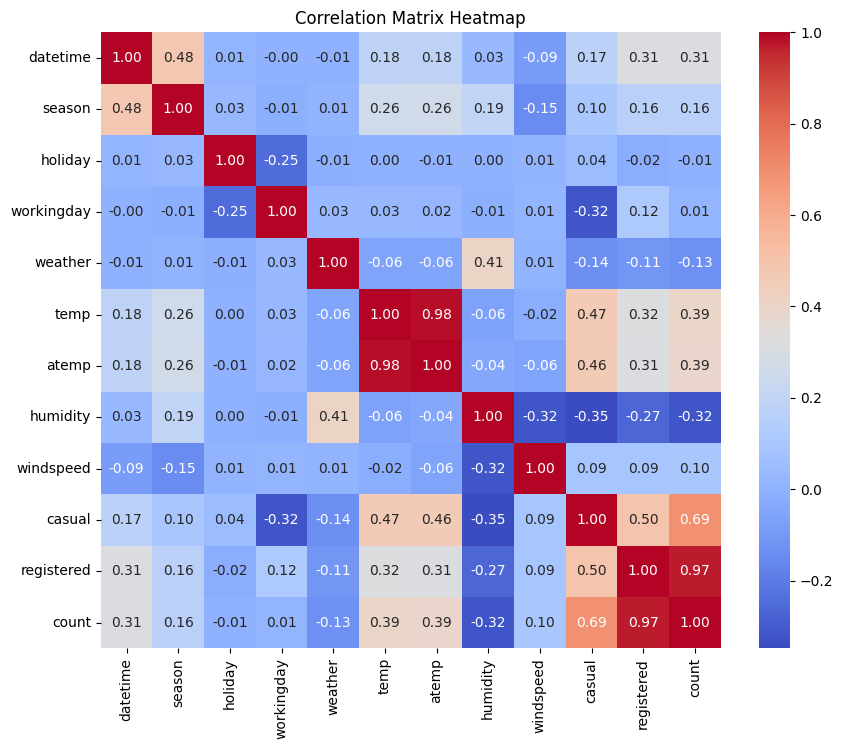

In [808]:
df_heatmap = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

*   The correlation of the parameters is evident that as correlation factor is >0.7. The attributes with corelation factor higher are 'registered' <-> 'count' and 'temp' <-> 'atemp'.
*   The attribute atemp can be dropped but registered and count shows the different values even if are correlated.



In [809]:
df.drop('atemp', axis=1, inplace=True)

In [810]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454


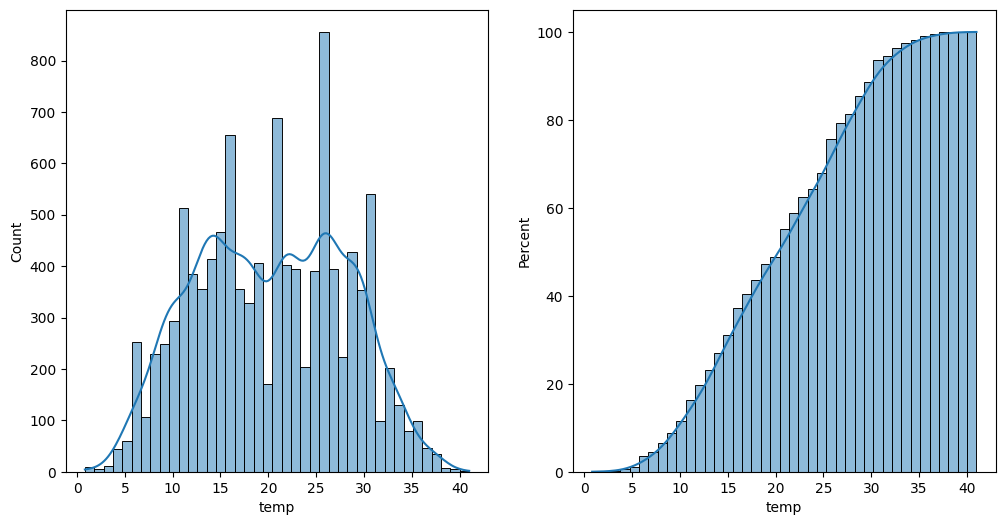

In [811]:
plt.figure(num = 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(df, x = 'temp',kde = True, bins = 41)

plt.subplot(122)
sns.histplot(df, x = 'temp',kde = True, bins = 41, cumulative = True, stat = 'percent')

plt.show()

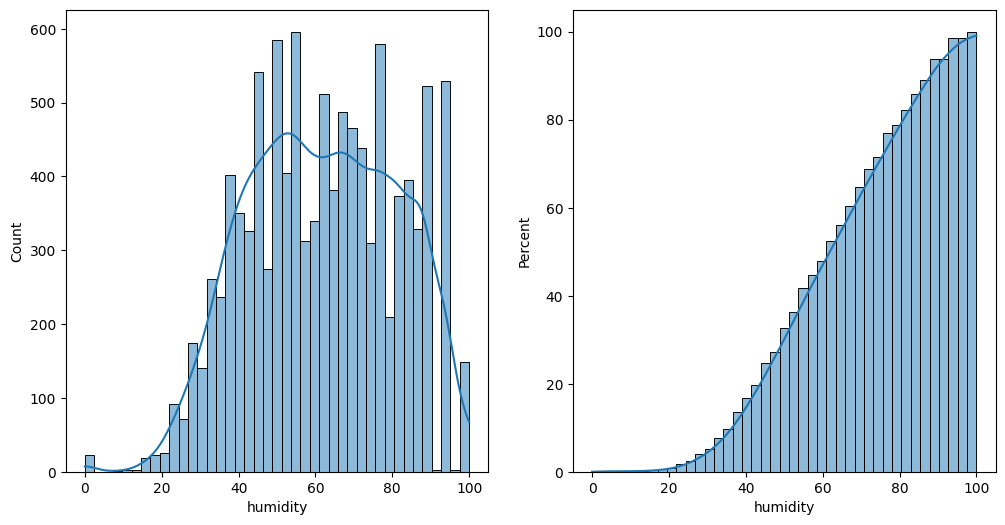

In [812]:
plt.figure(num = 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(df, x = 'humidity',kde = True, bins = 41)

plt.subplot(122)
sns.histplot(df, x = 'humidity',kde = True, bins = 41, cumulative = True, stat = 'percent')

plt.show()

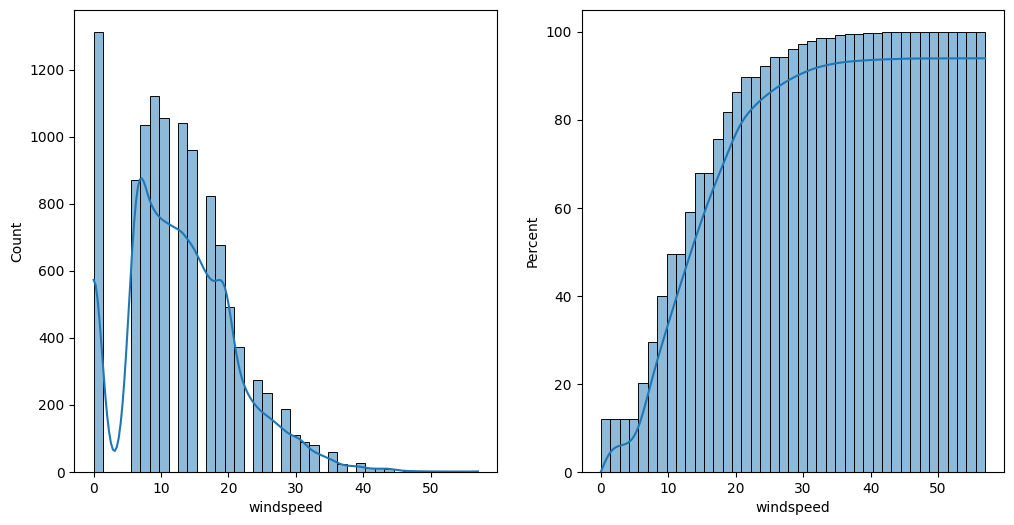

In [813]:
plt.figure(num = 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(df, x = 'windspeed',kde = True, bins = 41)

plt.subplot(122)
sns.histplot(df, x = 'windspeed',kde = True, bins = 41, cumulative = True, stat = 'percent')

plt.show()

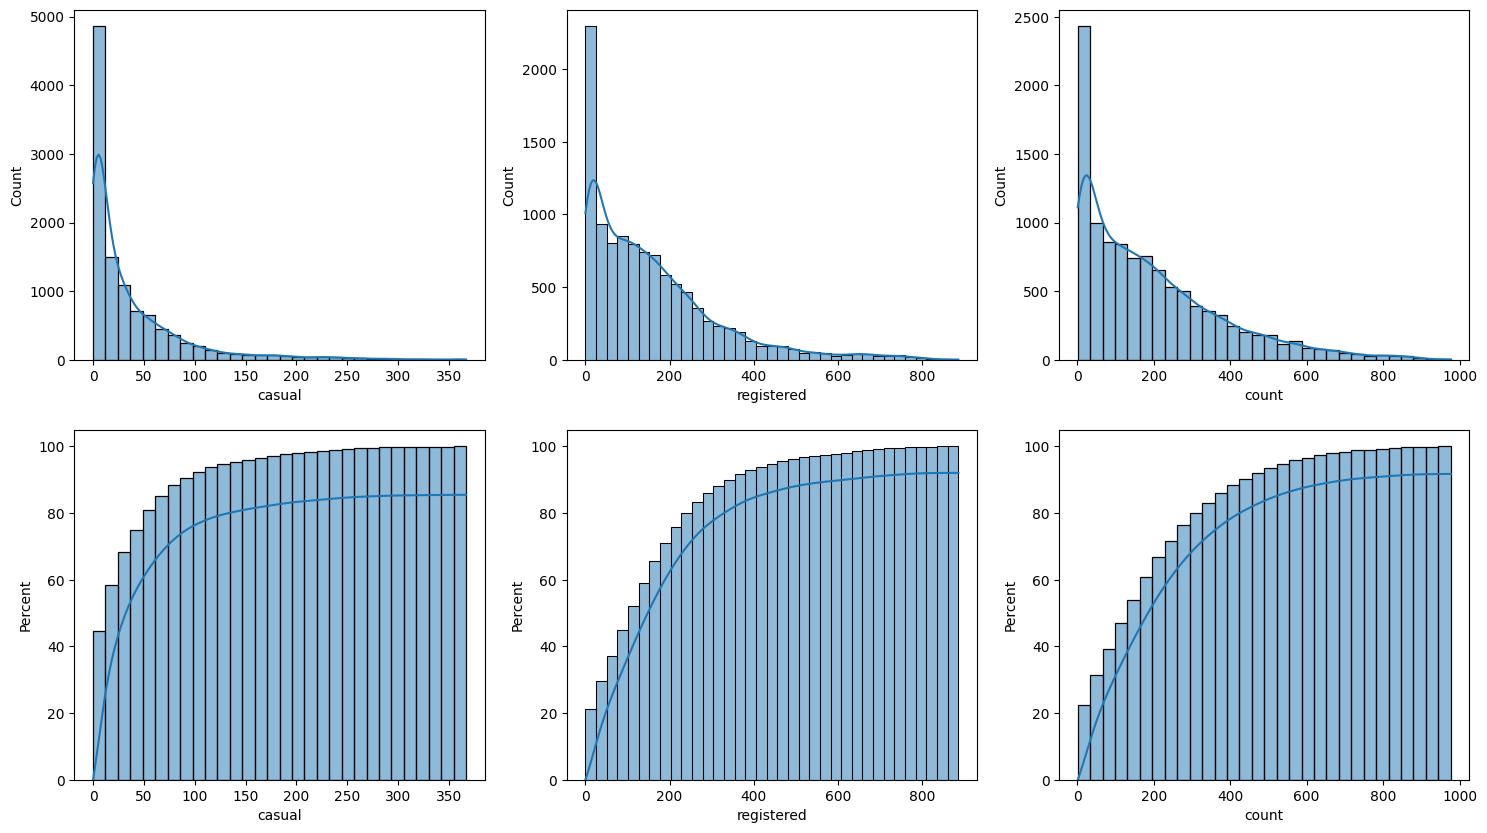

In [814]:
plt.figure(num = 6 , figsize = (18, 10))

plt.subplot(231)
sns.histplot(df, x = 'casual', kde = True ,bins = 30)

plt.subplot(232)
sns.histplot(df, x = 'registered', kde = True ,bins = 35)

plt.subplot(233)
sns.histplot(df, x = 'count', kde = True,bins = 30)

plt.subplot(234)
sns.histplot(df, x = 'casual', kde = True ,cumulative = True, bins  = 30 , stat = 'percent')

plt.subplot(235)
sns.histplot(df, x = 'registered', kde = True ,bins = 35, cumulative = True, stat = 'percent')

plt.subplot(236)
sns.histplot(df, x = 'count', kde = True,bins = 30, cumulative = True, stat = 'percent')

plt.show()

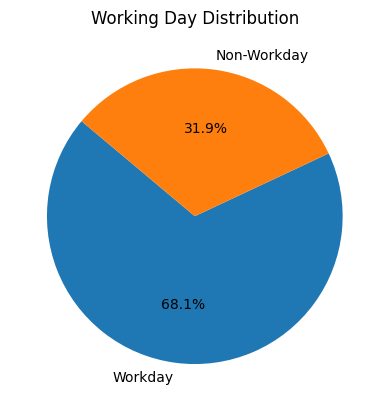

In [815]:
workingday_counts = df['workingday'].value_counts()
plt.pie(workingday_counts, labels=['Workday', 'Non-Workday'], autopct='%1.1f%%', startangle=140)
plt.title('Working Day Distribution')
plt.show()

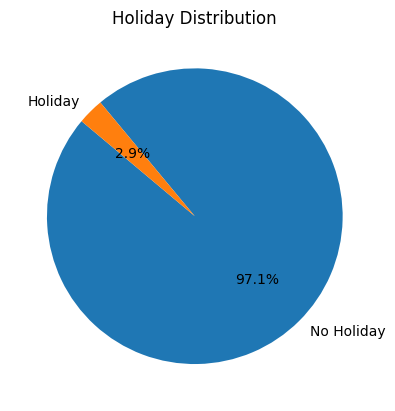

In [816]:
holiday_counts = df['holiday'].value_counts()
plt.pie(holiday_counts, labels=['No Holiday', 'Holiday'], autopct='%1.1f%%', startangle=140)
plt.title('Holiday Distribution')
plt.show()

In [817]:
len(df[(df['workingday'] == 2) & (df['holiday'] == 1)])

0

In [885]:
(len(df[(df['workingday'] == 0) & (df['holiday'] == 1)]),
len(df[(df['workingday'] == 0) & (df['holiday'] == 1)]) / len(df['workingday']) * 100)

(311, 2.856880396839978)

There are 0 days with weekday and holiday overlapping. There are 311 days when the holiday is on the weekend.

In [819]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(lambda x: season_mapping.get(x, x))

In [820]:
weather_mapping = {1 : 'favorable' , 2 : 'mild', 3 : 'challenging', 4: 'unfavorable'}
df['weather'] = df['weather'].map(lambda x: weather_mapping.get(x,x))

In [821]:
def wind_harshness(windspeed_kmph):
    if windspeed_kmph < 5:
        return 'Calm'
    elif windspeed_kmph < 20:
        return 'Light Breeze'
    elif windspeed_kmph < 40:
        return 'Moderate Breeze'
    elif windspeed_kmph < 60:
        return 'Strong Breeze'
    else:
        return 'High Winds'
df['windspeed'] = df['windspeed'].apply(wind_harshness)

In [822]:
def temp_harshness(temperature_degC):
    if temperature_degC <= 10:
        return 'Cool'
    elif temperature_degC <= 20:
        return 'Mild'
    elif temperature_degC <= 30:
        return 'Warm'
    else:
        return 'Hot'
df['temp'] =df['temp'].apply(temp_harshness)

In [823]:
def humidity_harshness(humidity_percent):
    if humidity_percent <= 30:
        return 'Dry'
    elif humidity_percent <= 60:
        return 'Comfortable'
    elif humidity_percent <= 80:
        return 'Humid'
    else:
        return 'Very Humid'
df['humidity'] = df['humidity'].apply(humidity_harshness)

In [824]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.hour

In [825]:
df['day_of_month'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

In [826]:
df['weekday'] = df['datetime'].dt.day_of_week

In [827]:
df['holiday'] = df['holiday'].astype('category')
df['season'] = df['season'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df['windspeed'] =df['windspeed'].astype('category')
df['temp'] =df['temp'].astype('category')
df['humidity'] = df['humidity'].astype('category')
df['day_of_month'] = df['day_of_month'].astype('category')
df['month'] = df['month'].astype('category')
df['weekday'] =df['weekday'].astype('category')

In [828]:
df.describe()

,datetime,casual,registered,count,time
count,10886,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,36.021955,155.552177,191.574132,11.541613
min,2011-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,4.000000,36.000000,42.000000,6.000000
50%,2012-01-01 20:30:00,17.000000,118.000000,145.000000,12.000000
75%,2012-07-01 12:45:00,49.000000,222.000000,284.000000,18.000000
max,2012-12-19 23:00:00,367.000000,886.000000,977.000000,23.000000
std,NaN,49.960477,151.039033,181.144454,6.915838


In [829]:
df.drop_duplicates(keep = 'first', inplace = True)

In [830]:
df = df[['date', 'time', 'holiday', 'workingday', 'season', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime', 'day_of_month', 'month', 'weekday']]

In [831]:
df['month'] = df['month'].apply(lambda x: pd.Timestamp(year= 2023 ,month=x, day=1).strftime('%B'))

In [832]:
weekday_mapping = {0 : 'Monday',1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday' , 6 : 'Sunday'}
df['weekday'] = df['weekday'].apply(lambda x: weekday_mapping.get(x,x))

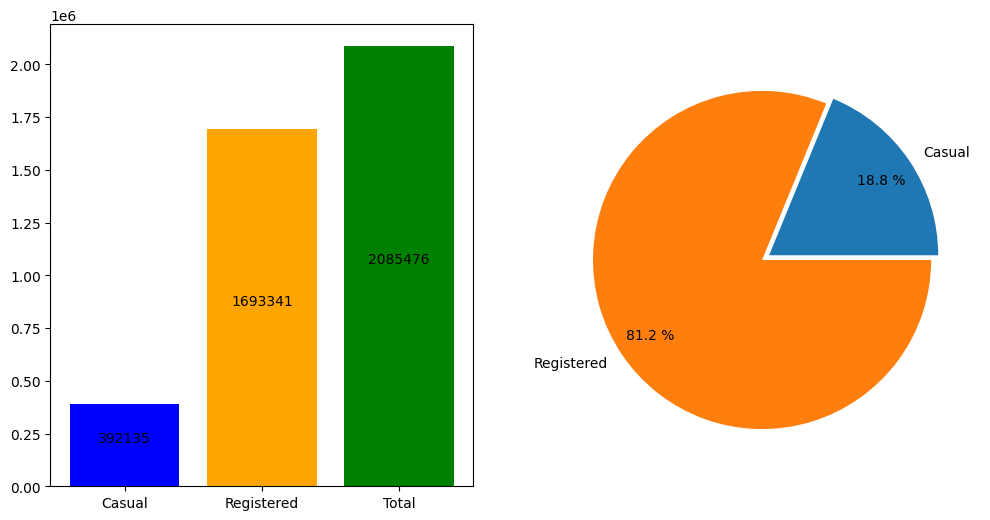

In [833]:
plt.figure(num = 2, figsize = (12,6))
plt.subplot(121)
ax = plt.bar(x = ['Casual', 'Registered','Total'], height= [df['casual'].sum(), df['registered'].sum(),df['count'].sum()], color = ['blue', 'orange','green'])

for p in ax.patches:
    plt.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()/2),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.subplot(122)

plt.pie(x = [df['casual'].sum(), df['registered'].sum()], labels = ['Casual', 'Registered'],
        autopct = "%.1f %%", pctdistance = 0.8,
        explode = [0, 0.05])

plt.show()

In [834]:
df_weekday = pd.DataFrame(df.groupby('weekday').agg({'casual' : 'sum' , 'registered' : 'sum' , 'count' : 'sum'})).reset_index()
df_weekday

,weekday,casual,registered,count
0,Monday,46288,249008,295296
1,Tuesday,35365,256620,291985
2,Wednesday,34931,257295,292226
3,Thursday,37283,269118,306401
4,Friday,47402,255102,302504
5,Saturday,100782,210736,311518
6,Sunday,90084,195462,285546


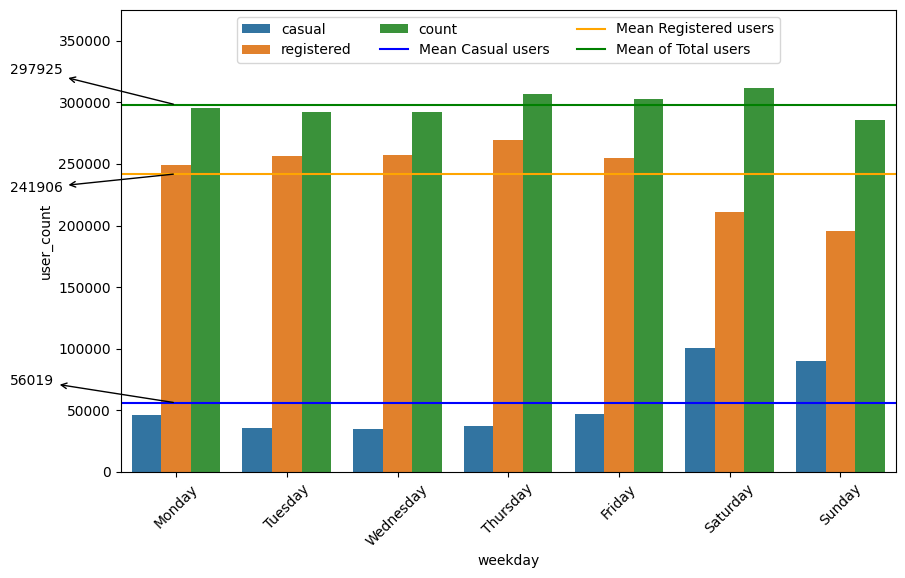

In [835]:
df_weekday_melt = pd.melt(df_weekday, id_vars=['weekday'], var_name='user_type', value_name='user_count')
plt.figure(figsize = (10,6))

sns.barplot(df_weekday_melt, x = 'weekday', y = 'user_count' , hue = 'user_type')


mean_casual = df_weekday_melt[df_weekday_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(-1.5, mean_casual+15000),
             arrowprops=dict(facecolor='blue', arrowstyle='<-'))

mean_registered = df_weekday_melt[df_weekday_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(-1.5, mean_registered - 15000),
             arrowprops=dict(facecolor='orange', arrowstyle='<-'))

mean_total = df_weekday_melt[df_weekday_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(-1.5, mean_total + 25000),
             arrowprops=dict(facecolor='green', arrowstyle='<-'))

plt.ylim(0, 375000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()

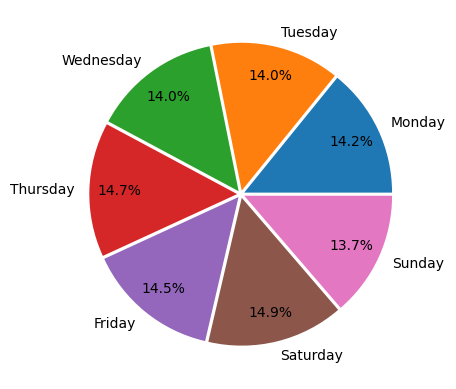

In [887]:
plt.pie(df_weekday['count'], labels = df_weekday['weekday'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.025]*len(df_weekday['weekday']))
plt.show()

In [836]:
df_month = pd.DataFrame(df.groupby('month').agg({'casual' : 'sum' , 'registered' : 'sum' , 'count' : 'sum'})).reset_index()
df_month

,month,casual,registered,count
0,January,7252,72632,79884
1,February,9297,89816,99113
2,March,25056,108445,133501
3,April,39813,127589,167402
4,May,41285,158862,200147
5,June,48574,172159,220733
6,July,50947,163670,214617
7,August,45870,167646,213516
8,September,45901,166628,212529
9,October,38087,169347,207434


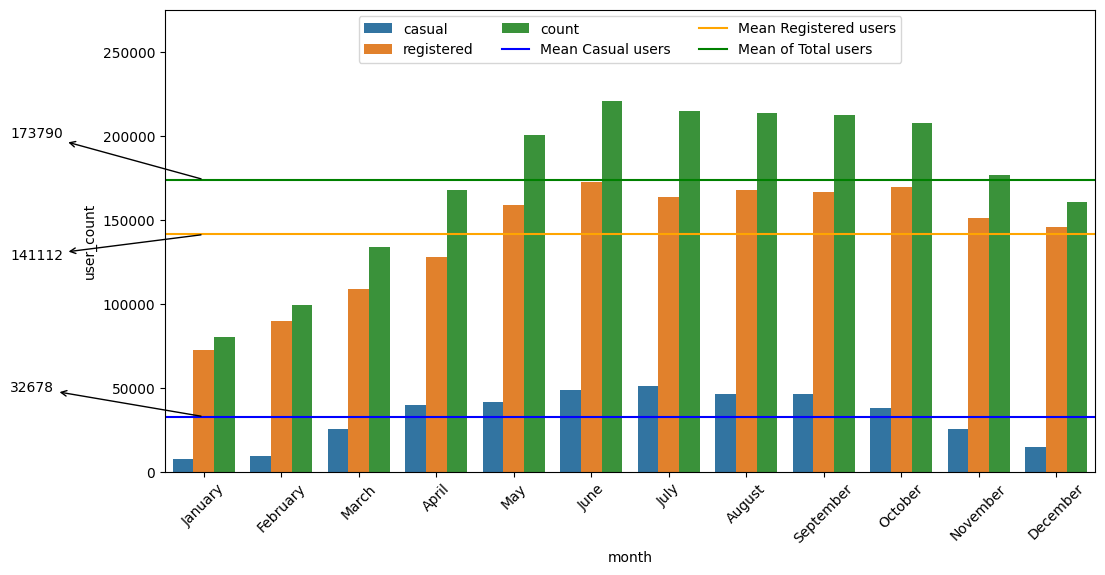

In [837]:
df_month_melt = pd.melt(df_month, id_vars=['month'], var_name='user_type', value_name='user_count')
plt.figure(figsize = (12,6))

sns.barplot(df_month_melt, x = 'month', y = 'user_count' , hue = 'user_type')

mean_casual = df_month_melt[df_month_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(-2.5, mean_casual+15000),
             arrowprops=dict(facecolor='blue', arrowstyle='<-'))

mean_registered = df_month_melt[df_month_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(-2.5, mean_registered - 15000),
             arrowprops=dict(facecolor='orange', arrowstyle='<-'))

mean_total = df_month_melt[df_month_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(-2.5, mean_total + 25000),
             arrowprops=dict(facecolor='green', arrowstyle='<-'))

plt.ylim(0, 275000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()


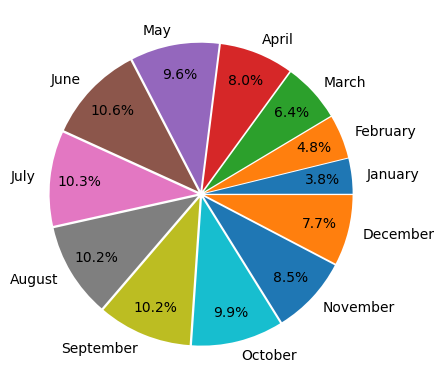

In [838]:
plt.pie(df_month['count'], labels = df_month['month'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.025]*len(df_month['month']))
plt.show()

In [907]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_month_season = df.groupby(['season', 'month']).agg({'count': 'sum'}).reset_index()
df_month_season = df_month_season[df_month_season['count'] != 0]
df_month_season['month'] = pd.Categorical(df_month_season['month'], categories=month_order, ordered=True)
df_month_season = df_month_season.sort_values('month')
df_month_season.reset_index(drop=True, inplace=True)
df_month_season

,season,month,count
0,spring,January,79884
1,spring,February,99113
2,spring,March,133501
3,summer,April,167402
4,summer,May,200147
5,summer,June,220733
6,fall,July,214617
7,fall,August,213516
8,fall,September,212529
9,winter,October,207434


In [839]:
# The users distribution depending on the season
df_season = pd.DataFrame(df.groupby(['season']).agg({'casual' : 'sum', 'registered' : 'sum', 'count' : 'sum'}).reset_index())
df_season

,season,casual,registered,count
0,fall,142718,497944,640662
1,spring,41605,270893,312498
2,summer,129672,458610,588282
3,winter,78140,465894,544034


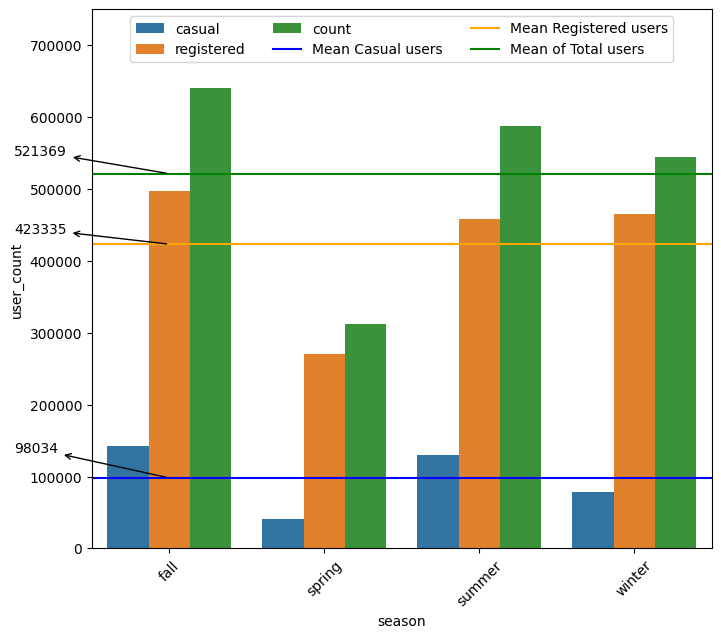

In [840]:
df_season_melt = pd.melt(df_season, id_vars=['season'], var_name='user_type', value_name='user_count')
plt.figure(figsize = (8,7))

sns.barplot(df_season_melt, x = 'season', y = 'user_count' , hue = 'user_type')

mean_casual = df_season_melt[df_season_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(-1, mean_casual+ 35000),
             arrowprops=dict(facecolor='blue', arrowstyle='<-'))

mean_registered = df_season_melt[df_season_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(-1, mean_registered + 15000),
             arrowprops=dict(facecolor='orange', arrowstyle='<-'))

mean_total = df_season_melt[df_season_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(-1, mean_total + 25000),
             arrowprops=dict(facecolor='green', arrowstyle='<-'))

plt.ylim(0, 750000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()

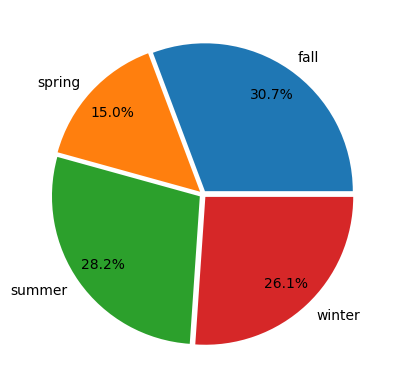

In [841]:
plt.pie(df_season['count'], labels = df_season['season'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.025]*len(df_season['season']))
plt.show()

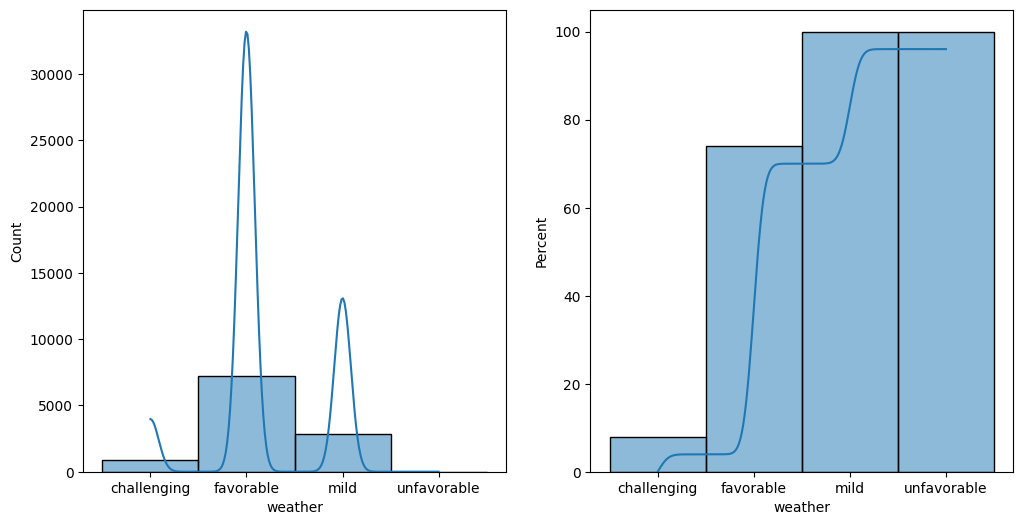

In [908]:
plt.figure(num = 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(df, x = 'weather',kde = True, bins = 4)

plt.subplot(122)
sns.histplot(df, x = 'weather',kde = True, bins = 4, cumulative = True, stat = 'percent')

plt.show()

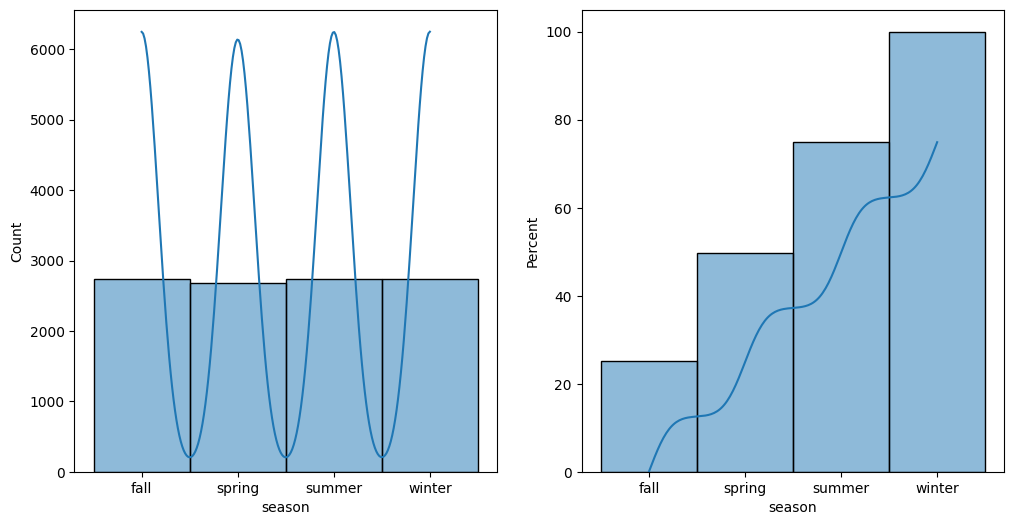

In [909]:
plt.figure(num = 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(df, x = 'season',kde = True, bins = 4)

plt.subplot(122)
sns.histplot(df, x = 'season',kde = True, bins = 4, cumulative = True, stat = 'percent')

plt.show()

In [842]:
# The users distribution depending on the weather
df_weather = pd.DataFrame(df.groupby(['weather']).agg({'casual' : 'sum', 'registered' : 'sum', 'count' : 'sum'}).reset_index())
df_weather.sort_values('count', ascending = False, inplace = True)

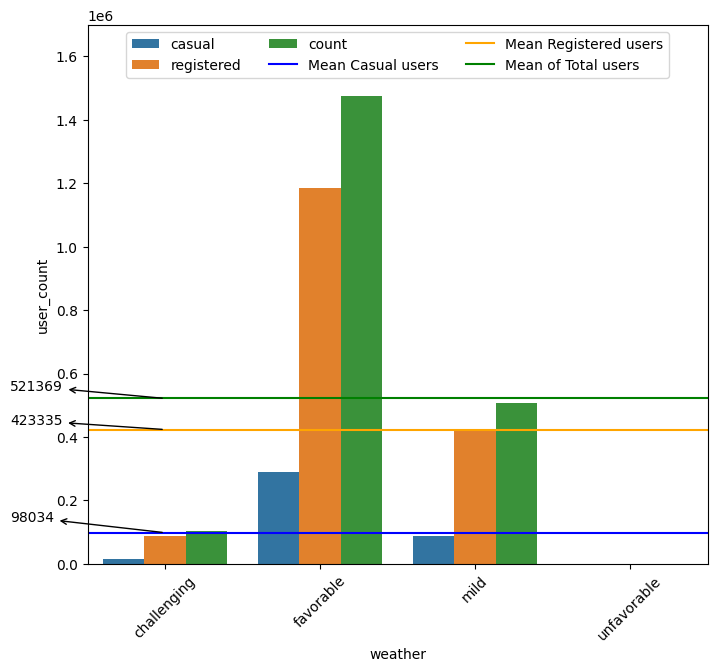

In [843]:
df_weather_melt = pd.melt(df_weather, id_vars=['weather'], var_name='user_type', value_name='user_count')

plt.figure(figsize = (8,7))

sns.barplot(df_weather_melt, x = 'weather', y = 'user_count' , hue = 'user_type')

mean_casual = df_weather_melt[df_weather_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(-1, mean_casual+ 35000),
             arrowprops=dict(facecolor='blue', arrowstyle='<-'))

mean_registered = df_weather_melt[df_weather_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(-1, mean_registered + 15000),
             arrowprops=dict(facecolor='orange', arrowstyle='<-'))

mean_total = df_weather_melt[df_weather_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(-1, mean_total + 25000),
             arrowprops=dict(facecolor='green', arrowstyle='<-'))

plt.ylim(0, 1.7*10**6)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()

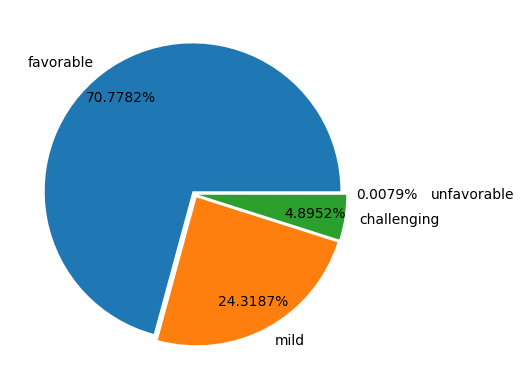

In [844]:
plt.pie(df_weather['count'], labels = df_weather['weather'],
        autopct = '%1.4 f%%', pctdistance = 0.7,
        explode = [0.025, 0.025, 0.025, 0.5])
plt.show()

In [845]:
df_temp = pd.DataFrame(df.groupby('temp').agg({'casual' : 'sum', 'registered' : 'sum', 'count' : 'sum'}).reset_index())
df_temp

,temp,casual,registered,count
0,Cool,4973,87168,92141
1,Hot,104288,311549,415837
2,Mild,80678,528555,609233
3,Warm,202196,766069,968265


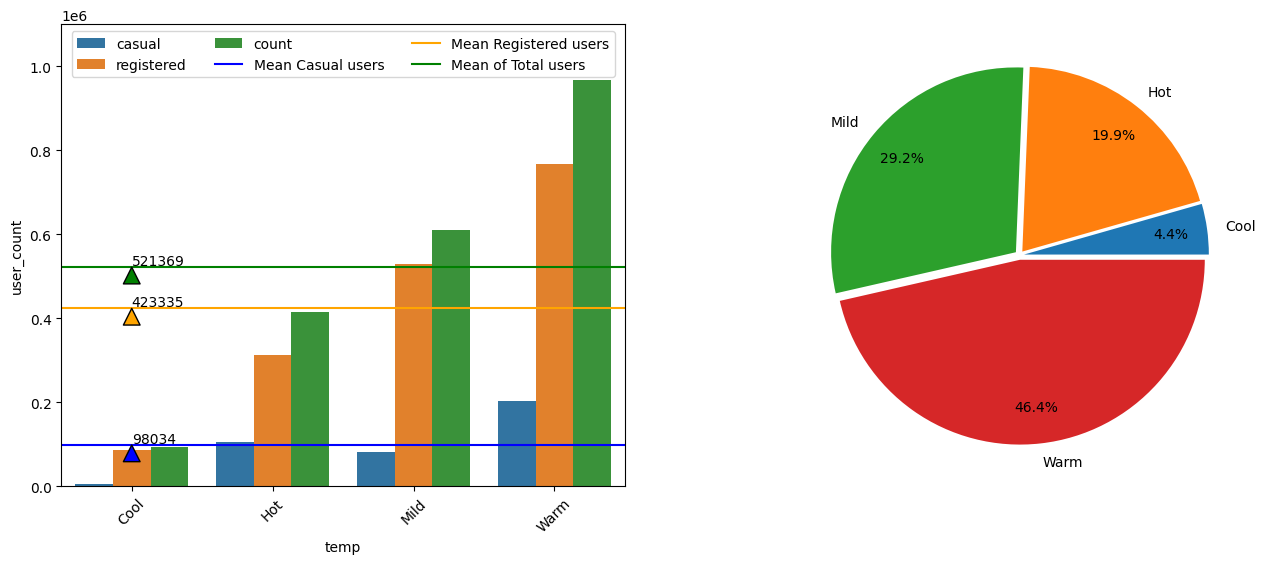

In [846]:
df_temp_melt = pd.melt(df_temp, id_vars=['temp'], var_name='user_type', value_name='user_count')
plt.figure(figsize = (16,6), num = 2)
plt.subplot(121)
sns.barplot(df_temp_melt, x = 'temp', y = 'user_count' , hue = 'user_type')

mean_casual = df_temp_melt[df_temp_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(0, mean_casual+ 5000),
             arrowprops=dict(facecolor='blue'))

mean_registered = df_temp_melt[df_temp_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(0, mean_registered + 5000),
             arrowprops=dict(facecolor='orange'))

mean_total = df_temp_melt[df_temp_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(0, mean_total + 5000),
             arrowprops=dict(facecolor='green'))

plt.ylim(0, 1100000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(122, aspect = 'equal')
plt.pie(df_temp['count'], labels = df_temp['temp'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.025]*len(df_temp['temp']))
plt.show()

In [847]:
df_time = pd.DataFrame(df.groupby('time').agg({'casual' : 'sum', 'registered' : 'sum', 'count' : 'sum'}).reset_index())
df_time

,time,casual,registered,count
0,0,4692,20396,25088
1,1,2957,12415,15372
2,2,2159,8100,10259
3,3,1161,3930,5091
4,4,558,2274,2832
5,5,658,8277,8935
6,6,1888,32810,34698
7,7,4966,92002,96968
8,8,9802,155258,165060
9,9,14085,86825,100910


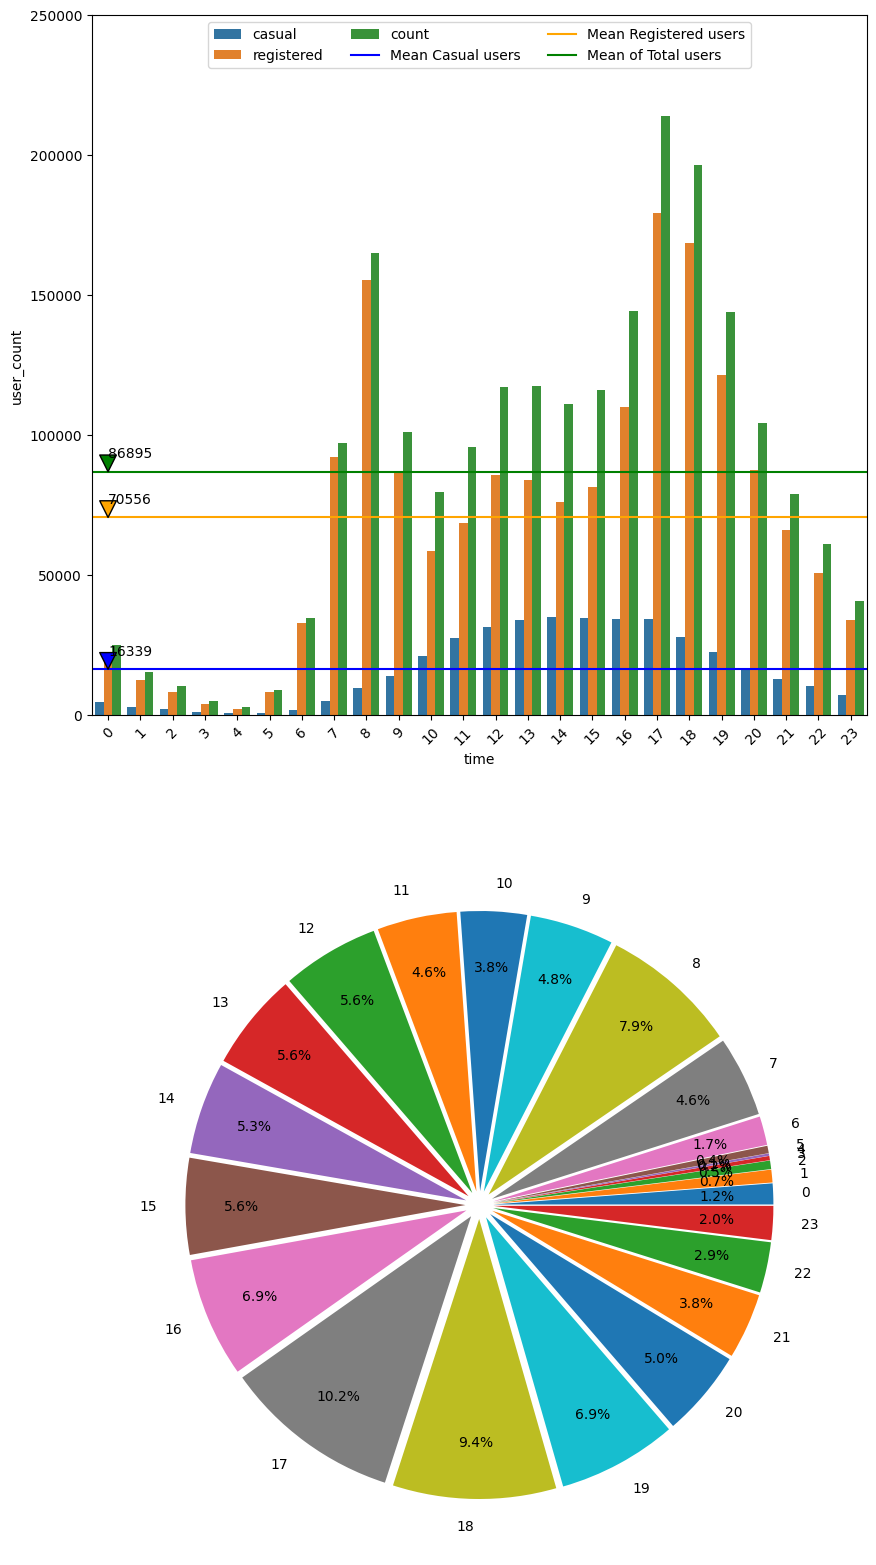

In [848]:
df_time_melt = pd.melt(df_time, id_vars=['time'], var_name='user_type', value_name='user_count')

plt.figure(figsize = (10,20), num = 2)
plt.subplot(211)
sns.barplot(df_time_melt, x = 'time', y = 'user_count' , hue = 'user_type')

mean_casual = df_time_melt[df_time_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(0, mean_casual+ 5000),
             arrowprops=dict(facecolor='blue'))

mean_registered = df_time_melt[df_time_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(0, mean_registered + 5000),
             arrowprops=dict(facecolor='orange'))

mean_total = df_time_melt[df_time_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(0, mean_total + 5000),
             arrowprops=dict(facecolor='green'))

plt.ylim(0, 250000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(212, aspect = 'equal')
plt.pie(df_time['count'], labels = df_time['time'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.05]*len(df_time))
plt.show()

In [849]:
#Converting the 24 hour Shcedule 3-6 hour groups depending on the time of day and rush hours.
bins = [-1, 5, 7, 10, 12, 16, 19, 23]  # Define bins for the groups
labels = ['Night', 'Early morning', 'Morning Rush Hour', 'Beforenoon','Afternoon', 'Evening rush hour', 'Early night']

df['time'] = pd.cut(df['time'], bins=bins, labels=labels, right=False)

In [850]:
df_time = pd.DataFrame(df.groupby('time').agg({'casual' : 'sum', 'registered' : 'sum', 'count' : 'sum'}).reset_index())
df_time

,time,casual,registered,count
0,Night,11527,47115,58642
1,Early morning,2546,41087,43633
2,Morning Rush Hour,28853,334085,362938
3,Beforenoon,48308,127216,175524
4,Afternoon,134752,326737,461489
5,Evening rush hour,96636,457859,554495
6,Early night,62462,325477,387939


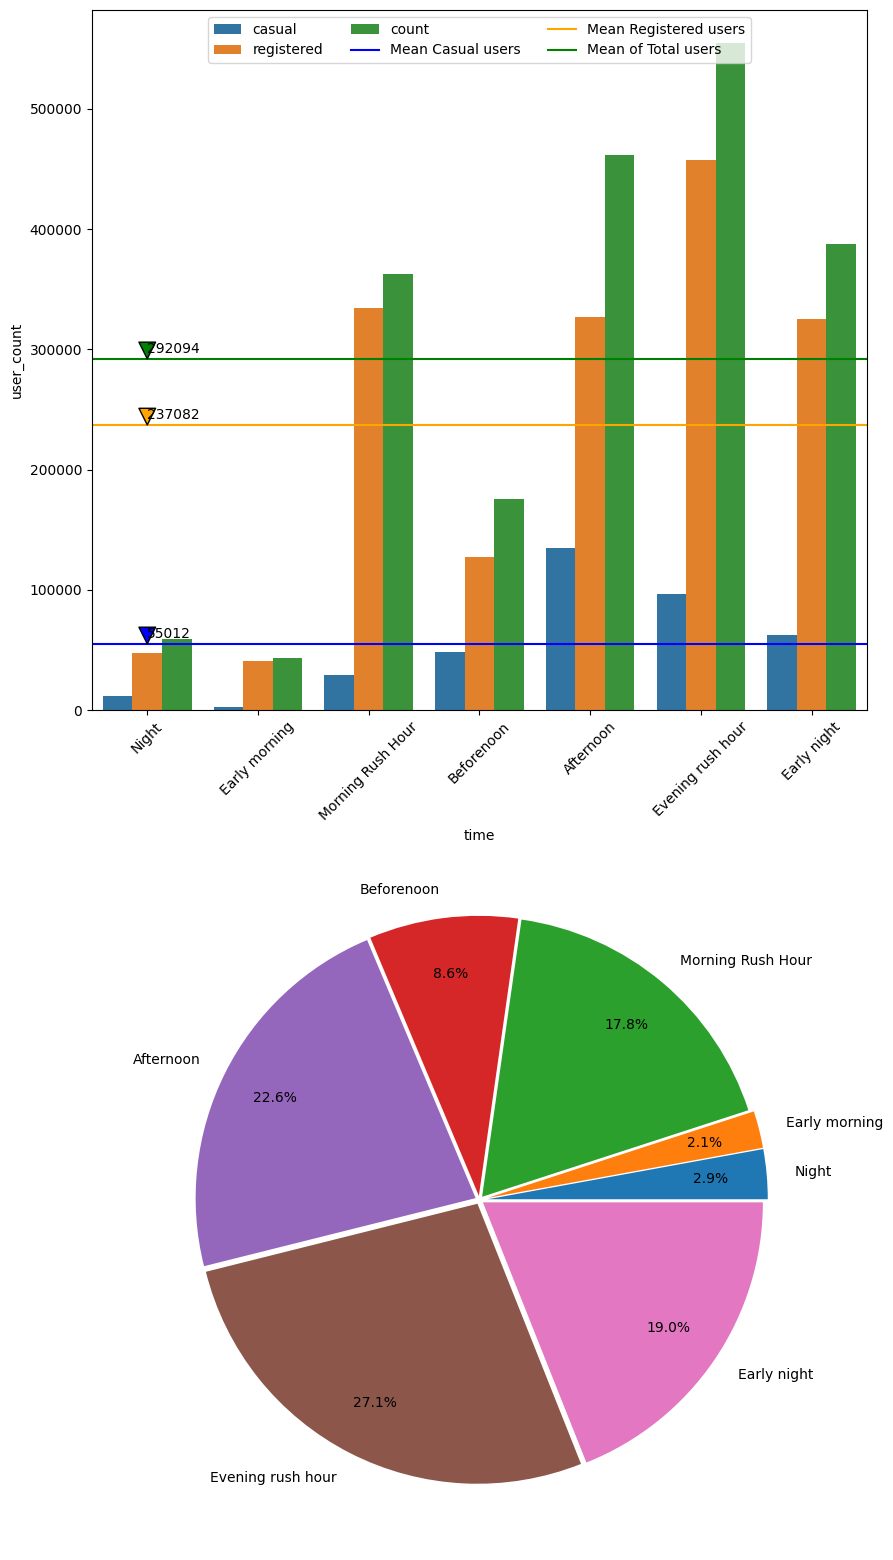

In [910]:
df_time_melt = pd.melt(df_time, id_vars=['time'], var_name='user_type', value_name='user_count')

plt.figure(figsize = (10,20), num = 2)
plt.subplot(211)
sns.barplot(df_time_melt, x = 'time', y = 'user_count' , hue = 'user_type')

mean_casual = df_time_melt[df_time_melt['user_type'] == 'casual']['user_count'].mean()
plt.axhline(y=mean_casual, label='Mean Casual users', color='blue')
plt.annotate(f'{mean_casual:.0f}', xy=(0, mean_casual), xytext=(0, mean_casual+ 5000),
             arrowprops=dict(facecolor='blue'))

mean_registered = df_time_melt[df_time_melt['user_type'] == 'registered']['user_count'].mean()
plt.axhline(y=mean_registered, label='Mean Registered users', color='orange')
plt.annotate(f'{mean_registered:.0f}', xy=(0, mean_registered), xytext=(0, mean_registered + 5000),
             arrowprops=dict(facecolor='orange'))

mean_total = df_time_melt[df_time_melt['user_type'] == 'count']['user_count'].mean()
plt.axhline(y=mean_total, label='Mean of Total users', color='green')
plt.annotate(f'{mean_total:.0f}', xy=(0, mean_total), xytext=(0, mean_total + 5000),
             arrowprops=dict(facecolor='green'))

# plt.ylim(0, 250000)
plt.xticks(rotation = 45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(212, aspect = 'equal')
plt.pie(df_time['count'], labels = df_time['time'],
        autopct = '%1.1f%%', pctdistance = 0.8,
        explode = [0.03 , 0.03, 0.015,0.015,0.015,0.015,0.015])
plt.show()

In [852]:
df.columns

Index(['date', 'time', 'holiday', 'workingday', 'season', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'datetime',
       'day_of_month', 'month', 'weekday'],
      dtype='object')

#Q3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [853]:
from scipy.stats import shapiro, f_oneway, levene
from scipy import stats

In [854]:
weekday = df[~df['weekday'].isin(['Saturday', 'Sunday'])]['count']
weekend = df[df['weekday'].isin(['Saturday', 'Sunday'])]['count']
(len(weekday),len(weekend))

(7723, 3163)

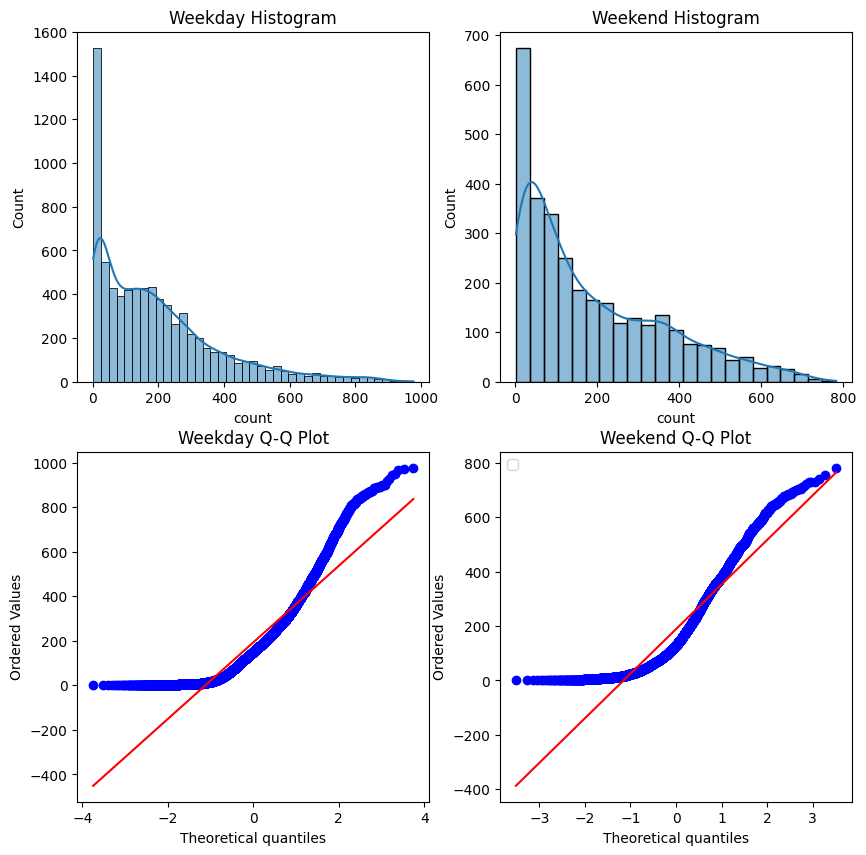

In [855]:
#Checking Normality of data with Histogram and QQplot

plt.figure(num = 4, figsize = (10,10))

plt.subplot(221)
sns.histplot(x = weekday, kde = True)
plt.title("Weekday Histogram")

plt.subplot(222)
sns.histplot(x = weekend, kde = True)
plt.title("Weekend Histogram")

plt.subplot(223)
stats.probplot(x = weekday, dist = 'norm', plot = plt)
plt.title("Weekday Q-Q Plot")

plt.subplot(224)
stats.probplot(x = weekend, dist = 'norm', plot = plt)
plt.title("Weekend Q-Q Plot")

plt.legend()
plt.show()

From above the distribution is not Normal. Further we go for the Shapiro-Wilkins test for effective analysis.

In [856]:
H0_shapiro = 'The sample data is Normally Distributed.'
Ha_shapiro = 'The sample data is not Normally Distributed.'

alpha = 0.05

# Analysis for the Weekday sample.
test_stat, p_value = shapiro(weekday.sample(5000))

if p_value > alpha:
    print(f'For sample Weekday, {H0_shapiro}')
else:
    print(f'For sample Weekday, {Ha_shapiro}')

# Analysis for the Weekend sample.
test_stat, p_value = shapiro(weekend)

if p_value > alpha:
    print(f'For sample Weekend, {H0_shapiro}')
else:
    print(f'For sample Weekend, {Ha_shapiro}')

For sample Weekday, The sample data is not Normally Distributed.
For sample Weekend, The sample data is not Normally Distributed.


As the data is not normally distributed, we use boxcox method for converting the data to Normal Distribution and again testing the normality with Shapiro test.

In [857]:
#For Boxcox,
H0_shapiro = 'The sample data is Normally Distributed.'
Ha_shapiro = 'The sample data is not Normally Distributed.'

alpha = 0.05

# Analysis for the Weekday sample.
weekday_boxcox = stats.boxcox(weekday.sample(5000))[0]
test_stat, p_value = stats.shapiro(weekday_boxcox)

if p_value > alpha:
    print(f'For sample Weekday, {H0_shapiro}')
else:
    print(f'For sample Weekday, {Ha_shapiro}')

# Analysis for the Weekend sample.
weekend_boxcox = list(stats.boxcox(weekend))[0]
test_stat, p_value = stats.shapiro(weekend_boxcox)

if p_value > alpha:
    print(f'For sample Weekend, {H0_shapiro}')
else:
    print(f'For sample Weekend, {Ha_shapiro}')

For sample Weekday, The sample data is not Normally Distributed.
For sample Weekend, The sample data is not Normally Distributed.


The results after the boxcox normalization method the data is still not Normally Distributed. The T-Test Independent method cannot be applicable as the data is not Normal. After searching for the alternate test for comparing two independent samples. Use of ttest_ind with Welch's variation, i.e. Non equal variances and Mann-Whitney U test are found. Applying the ttest_ind as suggested in the Solution Approach.

In [858]:
H0 = 'The number of rides on Weekdays and Weekends are not affected by the nature of the day.' # Null Hypothesis
Ha = 'The number of rides are affected by the nature of the day i.e. Weekdays and Weekends.' #Alternate Hypothesis

tstat1,p_value1 = ttest_ind(weekday, weekend, equal_var = False)

tstat1,p_value1 = round(tstat1,3), round(p_value1,3)

print(f'The T-test statistic is', tstat1 , 'p_value is', p_value1)

if p_value1 > 0.05:
  print(f'The Null Hypothesis cannot be rejected.', H0)
else:
  print(f'The Null Hypothesis is Rejected.' , Ha)

The T-test statistic is 1.059 p_value is 0.29
The Null Hypothesis cannot be rejected. The number of rides on Weekdays and Weekends are not affected by the nature of the day.


In [859]:
from scipy.stats import mannwhitneyu

In [860]:
tstat1,p_value1 = mannwhitneyu(weekday, weekend)

tstat1,p_value1 = round(tstat1,3), round(p_value1,3)

print(f'The T-test statistic is', tstat1 , 'p_value is', p_value1)

if p_value1 > 0.05:
  print(f'The Null Hypothesis cannot be rejected.', H0)
else:
  print(f'The Null Hypothesis is Rejected.' , Ha)

The T-test statistic is 12198463.5 p_value is 0.917
The Null Hypothesis cannot be rejected. The number of rides on Weekdays and Weekends are not affected by the nature of the day.


#Q4. Check if the demand of bicycles on rent is the same for different Weather conditions?

In [861]:
favorable = df[df['weather'] == 'favorable']['count']
mild= df[df['weather'] == 'mild']['count']
challenging = df[df['weather'] == 'challenging']['count']
unfavorable = df[df['weather'] == 'unfavorable']['count']

In [862]:
len(favorable),len(mild),len(challenging),len(unfavorable)

(7192, 2834, 859, 1)

Given the disparate lengths of weather conditions, with only one data point in the case of unfavorable weather, this outlier condition can be disregarded as it might distort the statistical analysis. Consequently, unfavorable weather conditions are excluded from further analysis.

In [863]:
H0_weather = 'The condition of the weather is not affecting the number of rented bicycles.'
Ha_weather = 'The condition of the weather is affecting the number of rented bicycles.'

print(f'The Null Hypothesis is {H0_weather} & \nThe alternate hypothesis is {Ha_weather}')

The Null Hypothesis is The condition of the weather is not affecting the number of rented bicycles. & 
The alternate hypothesis is The condition of the weather is affecting the number of rented bicycles.


To perform the statistical analysis the basic assumption is data is Normally Distributed. The Normality is to be checked with the Histograms and the QQplot.

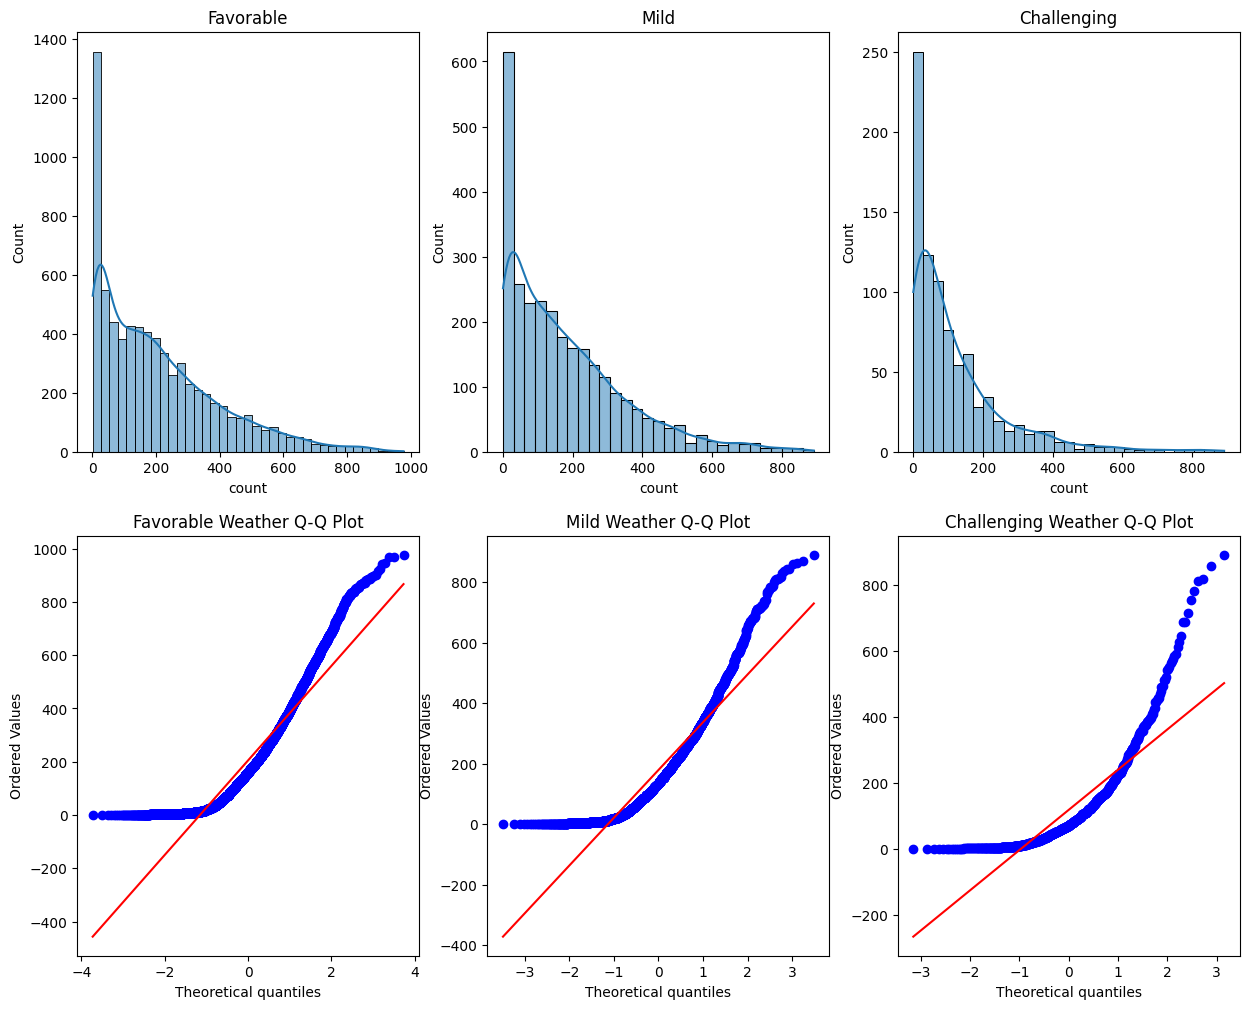

In [864]:
plt.figure(num = 6, figsize = (15, 12))


plt.subplot(231)
sns.histplot(favorable, kde = True)
plt.title('Favorable')

plt.subplot(234)
stats.probplot(x = favorable, dist = 'norm', plot = plt)
plt.title("Favorable Weather Q-Q Plot")

plt.subplot(232)
sns.histplot(mild, kde = True)
plt.title('Mild')

plt.subplot(235)
stats.probplot(x = mild, dist = 'norm', plot = plt)
plt.title("Mild Weather Q-Q Plot")

plt.subplot(233)
sns.histplot(challenging, kde = True)
plt.title('Challenging')

plt.subplot(236)
stats.probplot(x = challenging, dist = 'norm', plot = plt)
plt.title("Challenging Weather Q-Q Plot")

plt.show()

In [865]:
s1 = stats.skew(favorable)
s2 = stats.skew(mild)
s3 = stats.skew(challenging)

k1 = stats.kurtosis(favorable)
k2 = stats.kurtosis(mild)
k3 = stats.kurtosis(challenging)

print(s1,s2,s3)
print(k1,k2,k3)

1.1396195185041555 1.293759189703101 2.1833160390123187
0.9632151489948488 1.5835130178554868 5.961191782478394


Above Skewness and Kurtosis value indecates that all the samples are Rightly-skewed and the tails get heavier in weightage as the weather condition moves from Favorable to Challenging.

The data of all weather conditions are not normally distributed. Further Shapiro test to be performed to get the Normality of the data. The length of data for favorable weather to be sampled down to 5000 to conform to the limits of the Shapiro tests.

In [866]:
H0_shapiro = 'The sample data is Normally Distributed.'
Ha_shapiro = 'The sample data is not Normally Distributed.'

alpha = 0.05

# Analysis for the Favorable weather sample.
test_stat, p_value = shapiro(favorable.sample(5000))

if p_value > alpha:
    print(f'For sample Favorable weather, {H0_shapiro}')
else:
    print(f'For sample Favorable weather, {Ha_shapiro}')

# Analysis for the Mild weather sample.
test_stat, p_value = shapiro(mild)

if p_value > alpha:
    print(f'For sample Mild weather, {H0_shapiro}')
else:
    print(f'For sample Mild weather, {Ha_shapiro}')

# Analysis for the Challenging weather sample.
test_stat, p_value = shapiro(challenging)

if p_value > alpha:
    print(f'For sample Challenging weather, {H0_shapiro}')
else:
    print(f'For sample Challenging weather, {Ha_shapiro}')

For sample Favorable weather, The sample data is not Normally Distributed.
For sample Mild weather, The sample data is not Normally Distributed.
For sample Challenging weather, The sample data is not Normally Distributed.


As Shapiro test revealed the data samples are not Normally distributed. The Boxcox transformation is neede if the data can be normalised.

In [867]:
H0_shapiro = 'The sample data is Normally Distributed.'
Ha_shapiro = 'The sample data is not Normally Distributed.'

alpha = 0.05

# Analysis for the Favorable weather sample.
test_stat, p_value = shapiro(stats.boxcox(favorable.sample(5000))[0])

if p_value > alpha:
    print(f'For sample Favorable weather, {H0_shapiro}')
else:
    print(f'For sample Favorable weather, {Ha_shapiro}')

# Analysis for the Mild weather sample.
test_stat, p_value = shapiro(stats.boxcox(mild)[0])

if p_value > alpha:
    print(f'For sample Mild weather, {H0_shapiro}')
else:
    print(f'For sample Mild weather, {Ha_shapiro}')

# Analysis for the Challenging weather sample.
test_stat, p_value = shapiro(stats.boxcox(challenging)[0])

if p_value > alpha:
    print(f'For sample Challenging weather, {H0_shapiro}')
else:
    print(f'For sample Challenging weather, {Ha_shapiro}')

For sample Favorable weather, The sample data is not Normally Distributed.
For sample Mild weather, The sample data is not Normally Distributed.
For sample Challenging weather, The sample data is not Normally Distributed.


Even after using the Boxcox transformation the data is not Normally Distributed. This requires further investigation using the Levene's Test to perform the One-way ANOVA analysis.(As weather samples are greater than 2, Normal Statistical tests cannot be used.)

In [868]:
H0_Levene = 'The Data samples have Homogenous Variances.'
Ha_Levene = 'The Data samples do not have Homogenous Variances.'

alpha = 0.05

# The samples are resampled without bootstrapping to 500 length.

test_stat, p_value = levene(favorable.sample(500),
                            mild.sample(500),
                            challenging.sample(500))

# p_value = round(p_value,2)
print(f'p_value = {p_value}')

if p_value < alpha:
  print(f'The Null hypothesis is rejected and {Ha_Levene}')
else:
  print(f'The Null Hypothesis is failed to reject and {H0_Levene}')

p_value = 3.305236962075413e-11
The Null hypothesis is rejected and The Data samples do not have Homogenous Variances.


### The two of the assumtions of the Oneway ANOVA test are violated which were,Normality of the Samples and the Homogenity of the Variances. The Need for the alternate method of statistical analysis is required.
### As per the requirement of 3 sample statistical analysis and Non-Normal and Non-Homogenous test. The Kruskal-Wallis Test can be perfomed to test the Hypothesis.

In [869]:
kw_teststat , p_value_kw = stats.kruskal(favorable, mild, challenging)
print(f'The Test statistics is {kw_teststat}.\nThe P_value is {p_value_kw} ')

if p_value_kw < alpha:
  print(f'The Null Hypotesis is rejected. {Ha_weather}')
else:
  print(f'The Null Hypothesis cannot be rejected. {H0_weather}')

The Test statistics is 204.95566833068537.
The P_value is 3.122066178659941e-45 
The Null Hypotesis is rejected. The condition of the weather is affecting the number of rented bicycles.


#Q5.  Check if the demand of bicycles on rent is the same for different Seasons?

In [870]:
df['season'].value_counts()

season
winter    2734
fall      2733
summer    2733
spring    2686
Name: count, dtype: int64

In [871]:
summer = df[df['season'] == 'summer']['count']
winter= df[df['season'] == 'winter']['count']
fall = df[df['season'] == 'fall']['count']
spring = df[df['season'] == 'spring']['count']

In [872]:
(len(summer),len(winter),len(fall),len(spring))

(2733, 2734, 2733, 2686)

As the samples are similar in size, all the samples are selected for the statistical analysis.

In [873]:
H0_season = 'The condition of the season is not affecting the number of rented bicycles.'
Ha_season = 'The condition of the season is affecting the number of rented bicycles.'

print(f'The Null Hypothesis is {H0_season} & \nThe alternate hypothesis is {Ha_season}')

The Null Hypothesis is The condition of the season is not affecting the number of rented bicycles. & 
The alternate hypothesis is The condition of the season is affecting the number of rented bicycles.


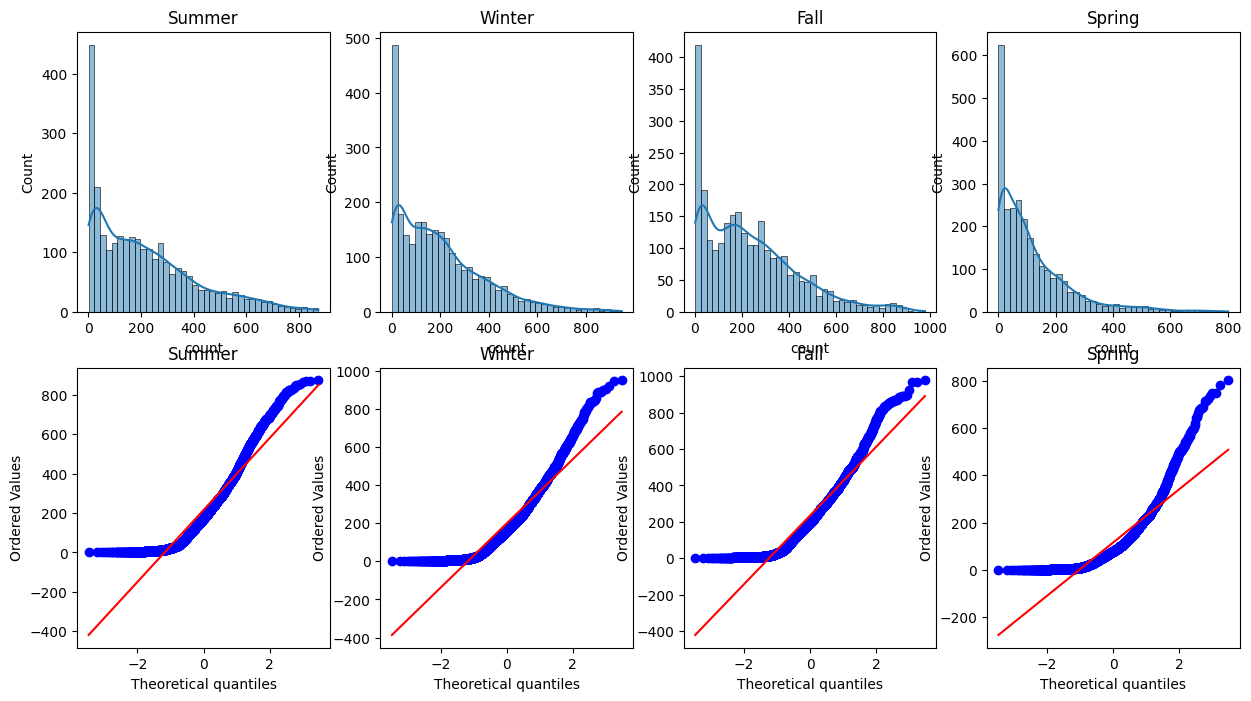

In [874]:
# Checking the Normal Distribution of the samples using Histograms and QQplot.

plt.figure(num = 8, figsize = (15,8))

plt.subplot(241)

sns.histplot(summer,kde = True,bins = 40)
plt.title('Summer')
plt.subplot(242)
sns.histplot(winter,kde = True,bins = 40)
plt.title('Winter')
plt.subplot(243)
sns.histplot(fall,kde = True,bins = 40)
plt.title('Fall')
plt.subplot(244)
sns.histplot(spring,kde = True,bins = 40)
plt.title('Spring')
plt.subplot(245)
stats.probplot(x = summer, dist = 'norm', plot = plt)
plt.title("Summer")
plt.subplot(246)
stats.probplot(x = winter, dist = 'norm', plot = plt)
plt.title("Winter")
plt.subplot(247)
stats.probplot(x = fall, dist = 'norm', plot = plt)
plt.title("Fall")
plt.subplot(248)
stats.probplot(x = spring, dist = 'norm', plot = plt)
plt.title("Spring")
plt.show()

As evident from the above graphs that the data is not normally distributed. Shapiro test is required to confirm the same.

In [875]:
H0_shapiro = 'The sample data is Normally Distributed.'
Ha_shapiro = 'The sample data is not Normally Distributed.'

alpha = 0.05

# Analysis for the Summer sample.
test_stat, p_value = shapiro(summer)

if p_value > alpha:
    print(f'For sample Summer, {H0_shapiro}')
else:
    print(f'For sample Summer, {Ha_shapiro}')

# Analysis for the Winter sample.
test_stat, p_value = shapiro(winter)

if p_value > alpha:
    print(f'For sample Winter, {H0_shapiro}')
else:
    print(f'For sample Winter, {Ha_shapiro}')

# Analysis for the Fall sample.
test_stat, p_value = shapiro(fall)

if p_value > alpha:
    print(f'For sample Fall, {H0_shapiro}')
else:
    print(f'For sample Fall, {Ha_shapiro}')

# Analysis for the Spring sample.
test_stat, p_value = shapiro(spring)

if p_value > alpha:
    print(f'For sample Spring, {H0_shapiro}')
else:
    print(f'For sample Spring, {Ha_shapiro}')

For sample Summer, The sample data is not Normally Distributed.
For sample Winter, The sample data is not Normally Distributed.
For sample Fall, The sample data is not Normally Distributed.
For sample Spring, The sample data is not Normally Distributed.


In [876]:
# Using Boxcox transformation for converting the data in normal distributed data and checking with Shapiro test.
# Analysis for the Summer sample.
test_stat, p_value = shapiro(stats.boxcox(summer)[0])

if p_value > alpha:
    print(f'For sample Summer, {H0_shapiro}')
else:
    print(f'For sample Summer, {Ha_shapiro}')

# Analysis for the Winter sample.
test_stat, p_value = shapiro(stats.boxcox(winter)[0])

if p_value > alpha:
    print(f'For sample Winter, {H0_shapiro}')
else:
    print(f'For sample Winter, {Ha_shapiro}')

# Analysis for the Fall sample.
test_stat, p_value = shapiro(stats.boxcox(fall)[0])

if p_value > alpha:
    print(f'For sample Fall, {H0_shapiro}')
else:
    print(f'For sample Fall, {Ha_shapiro}')

# Analysis for the Spring sample.
test_stat, p_value = shapiro(stats.boxcox(spring)[0])

if p_value > alpha:
    print(f'For sample Spring, {H0_shapiro}')
else:
    print(f'For sample Spring, {Ha_shapiro}')

For sample Summer, The sample data is not Normally Distributed.
For sample Winter, The sample data is not Normally Distributed.
For sample Fall, The sample data is not Normally Distributed.
For sample Spring, The sample data is not Normally Distributed.


In [877]:
#To proceed further to reject the feasibility of the oneway ANOVA,
# the Homogenity of the variances is needs to be checked to violate
# the Assumtion of oneway ANOVA. The HOmogenity is checkrd with Levene's Test.

H0_Levene = 'The Data samples have Homogenous Variances.'
Ha_Levene = 'The Data samples do not have Homogenous Variances.'

alpha = 0.05

# The samples are resampled without bootstrapping to 500 length.

test_stat, p_value = levene(summer.sample(500),
                            winter.sample(500),
                            fall.sample(500),
                            spring.sample(500))

# p_value = round(p_value,2)
print(f'p_value = {p_value}')

if p_value < alpha:
  print(f'The Null hypothesis is rejected and {Ha_Levene}')
else:
  print(f'The Null Hypothesis is failed to reject and {H0_Levene}')

p_value = 3.684252193396768e-20
The Null hypothesis is rejected and The Data samples do not have Homogenous Variances.


Due to Distribution of data being not Normal and The Variances of the data being Non-Homogenous, the Application of ANOVA is voided. The Kruskal-Wallis test is preffresed in this case.



In [878]:
kw_teststat , p_value_kw = stats.kruskal(summer, winter, fall, spring)
print(f'The Test statistics is {kw_teststat}.\nThe P_value is {p_value_kw} ')

if p_value_kw < alpha:
  print(f'The Null Hypotesis is rejected. {Ha_season}')
else:
  print(f'The Null Hypothesis cannot be rejected. {H0_season}')

The Test statistics is 699.6668548181915.
The P_value is 2.4790083726176776e-151 
The Null Hypotesis is rejected. The condition of the season is affecting the number of rented bicycles.


#6. Check if the Weather conditions are significantly different during different Seasons?

### As we need to find the effect of two Categorical Attributes on the numerical data, the Effective method to analyse the statistics is Chi-Squared test.

In [879]:
# The Hypotheses of the Chi-Squared Analysis are as below,
H0_sw = 'The Weather and Seasons are not interrelated. i.e. The Weather and Seasons are not dependent. Based on number of Rented bicycles.'
Ha_sw = 'The Weather and Seasons are interrelated. i.e. The Weather and Seasons are dependent.Based on number of Rented bicycles.'

alpha_sw = 0.05

In [880]:
df_sw = pd.crosstab(index = df['weather'],
                    columns = df['season'],
                    values = df['count'],
                    aggfunc = np.sum)
df_sw

season,fall,spring,summer,winter
weather,,,,
challenging,31160,12919,27755,30255
favorable,470116,223009,426350,356588
mild,139386,76406,134177,157191
unfavorable,0,164,0,0


As the Unfavorable weather conditions is having only 1 data point common with the spring season and all other values are 0. The Unfavorable weather condition can be neglected.

In [881]:
df_sw = df_sw.iloc[0:-1,:]

In [882]:
df_sw

season,fall,spring,summer,winter
weather,,,,
challenging,31160,12919,27755,30255
favorable,470116,223009,426350,356588
mild,139386,76406,134177,157191


In [883]:
chi_test_stat, p_value, dof, expected_values = stats.chi2_contingency(df_sw)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)

if p_value < alpha:
    print(f'Reject Null Hypothesis.{Ha_sw}')
else:
    print(f'Failed to reject Null Hypothesis.{H0_sw}')

Test Statistic = 10838.372332480216
p value = 0.0
Reject Null Hypothesis.The Weather and Seasons are interrelated. i.e. The Weather and Seasons are dependent.Based on number of Rented bicycles.


## Insights of EDA
####•	The basic analysis of the data revealed below things,
#####o	There are 10886 rows and 12 columns, i.e. Attributes.
#####o	The hourly data collected start from 01-01-2011 and ending at 19-12-2012 for 718 days span.
#####o	The data does not have any Null values, and no duplicate Rows.
####•	The Correlation Heatmap of all the parameters show below,
#####o	Correlation factor > 0.9:  [registered, count] and [temp, atemp ]. 'atemp’ can be dropped as it provides same information.
#####o	Correlation Factor 0.7-0.9 : None
#####o	Correlation Factor  < 0.7 : All other pairs of the datasets.
####•	EDA of all attributes,
o	Temperature varies from 1 – 41 C.
o	80% of the time, users are using when Temperature is 28 and below. i.e. 80 % data points exist in temperature below 28 C.
o	Wind speed varies from 0 – 57 KMPH.
o	The 90% of data is having Wind speed,  <= 30 KMPH.
o	Humidity varies from 0 – 100 %.
o	Variation of data across the Humidity range is uniform.
####•	80 % of time Casual user count are below 60 users.
####•	80% of time registered user count is below 220 users.
####•	80 % of time total user count is below 350 users.
####•	68.1 % days are Working days and remaining are Non-working days.
####•	Only 2.9% of the days are Holidays.
####•	Non-working day and Holiday coincide at 311 times, i.e. 2.85% of the total days.
####•	18.8% Users are Casual and 81.2% Users are Registered.
####•	The total users are approximately 14 % on all days.
####•	The total users are majority in summer and fall season i.e. 60 %. The season of spring is least preferred i.e. 15%.
####•	The Seasons are equally distributed across the data.
####•	The Weather conditions of the mostly favorable followed by mild and challenging. The unfavorable conditions exists only 1 data points.
####•	70 % users are using the rented bicycles on Favorable weather conditions and 0.079% in unfavorable weather conditions.
####•	95 % users are using in weather condition Favorable and Mild.
####•	74.7 % users are using rented bicycles at temperature range 20 -41 C.
####•	45 % users are using the in the Moring and Evening Rush Hours. Second best time zones are 41.6% users are in Afternoon and Early Night.
####•	The users are not preferring the Weekend or Weekday over each other. (Independent T-Test & Mann-Whitney U test)
####•	The Weather is affecting the Number of Users. (Kruskal-Wallis H test)
####•	The season is affecting the Number of Users. (Kruskal-Wallis H test)
####•	The Weather and Seasons are interrelated. i.e. The Weather and Seasons are dependent. Based on number of Rented bicycles. (Chi-Squared Analysis)

# Suggestions for improving the Revenue.
## Promotions and Marketing :
The marketing to be taregetetd aroung Fall and Summer seasons. This will improve the number of users. Special Promotional offers or seasonal offers to be provided to the regular users as well to maintain the continuous usage of bikes. As during the day's specified time zones where the user numbers drops, special offers to be provided to increase the number of users.

## Monthly Membership:
As most of the users are registered (81%) , monthly membership program must be provided. As suggested by the time-zone specific visual analysis, the Morning and Evening Rush hours are high user number zones. This leads to conclusion that most users in these zones are Work-goers and they are frequent users as well. These users can join the Monthly Memberships. Lucrative Offers to be made for such cases.

## Weather pattern based product modifications:
In Challenging and Mild weathers people are not preffering the rented bicycles, the reason can be feeling of harshness of weather. This user experience can be improved by providing the weather pattern based promotional offers.

## Creating Effective Maintenance planning:
The Months with lower demands can be utilised for effective overhauling and maintenance. Utilising this opportunity will provide effective predictive maintenance and regular maintenance policies to lower carried inventory costs. The Breakdown maintenance policies can be carried out with lower inventory costs. This can help in minimising the breakdown of bicycles while in-use.


## Corporate Tie-ups:
Tie-ups with corporate units for promoting the usage of the rented bicycles with benefit of CO2 emmision reduction certificate. This can be a great move in increasing the usage with corporate mandate for effective resource management and cost reduction.

## Providing Low weight Covers for User:
There are various weather conditions which can be improved for users by modifying the vehicles to provide the Fiber/Polymer based covers. This can improve the usage of the bicycles in the mild and Challenging conditions. This might improve the usage in unfavorable condition as well but may reduce life of the Covers.